In [1980]:
import pandas as pd
import numpy as np

In [1981]:
df=pd.read_csv('../datasets/no_wage_data.csv')

In [1982]:
df.head()

,geoid,area_fips,county,qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,month3_emplvl_11_agriculture_forestry_fishing_and_hunting,lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting,qtrly_estabs_1024_professional_and_business_services,...,lq_month3_emplvl_48_49_transportation_and_warehousing.3,quarter.3,rank,name,states,year,category,damage,adjusted_damage,damage_by_county
0,Charlie,12095,Orange,227.0,0.0,0.0,0.00,0.65,0.00,6576.0,...,0.95,1.0,12,Charlie,FL,2004,4,16.0,21.1,2.813333
1,Charlie,12087,Monroe,26.0,0.0,0.0,0.00,0.55,0.00,648.0,...,0.72,1.0,12,Charlie,FL,2004,4,16.0,21.1,2.813333
2,Charlie,12049,Hardee,118.0,0.0,0.0,0.00,18.63,0.00,47.0,...,0.00,1.0,12,Charlie,FL,2004,4,16.0,21.1,2.813333
3,Charlie,12027,DeSoto,119.0,0.0,0.0,0.00,16.85,0.00,46.0,...,0.00,1.0,12,Charlie,FL,2004,4,16.0,21.1,2.813333
4,Charlie,12021,Collier,98.0,291.0,9653.0,0.85,0.80,9.29,2131.0,...,0.36,1.0,12,Charlie,FL,2004,4,16.0,21.1,2.813333


In [1983]:
[c for c in df.columns if 'damage' in c]

['damage', 'adjusted_damage', 'damage_by_county']

In [1984]:
#Null columns
df=df.drop([10,117])

In [1985]:
#Create estimates for hurricane damage by county
for i in df['geoid'].unique():
    count = df[df['geoid'] == i].shape[0]
    df.loc[df['geoid'] == i,'damage_by_county'] = df.loc[df['geoid'] == i,'damage'] * .8/count

In [1986]:
df['damage_by_county'].value_counts()

0.675000     16
3.076923     13
1.233333     12
1.490909     11
0.784000     10
11.111111     9
2.868571      7
1.142857      7
16.666667     6
2.533333      6
2.133333      6
8.666667      6
14.400000     5
6.000000      4
Name: damage_by_county, dtype: int64

In [1987]:
df.shape

(118, 789)

In [1988]:
df.columns[800:]

Index([], dtype='object')

In [1989]:
[c for c in df.columns if 'quarter' in c]

['quarter', 'quarter.1', 'quarter.2', 'quarter.3']

In [1990]:
cols_lq=[c for c in df.columns if c[0:2]=='lq']
cols_lq.append('geoid')
cols_lq.append('area_fips')
cols_lq.append('year')
cols_lq.append('county')
cols_lq
df_lq=df[cols_lq]

In [1991]:
#Create separate dataframes for only LQ columns
cols=[c for c in df.columns if 'unclassified' not in c]
colslq_cl=[c for c in df_lq.columns if 'unclassified' not in c]

In [1992]:
dfc=df[cols]
df_lq=df_lq[colslq_cl]

In [1993]:
df_lq.shape

(118, 364)

In [1994]:
dfc.shape

(118, 741)

In [1995]:
dfc.isnull().sum().sort_values(ascending=False).head(50)

quarter.3                                                            13
avg_wkly_wage_55_management_of_companies_and_enterprises             12
month3_emplvl_55_management_of_companies_and_enterprises.2           12
lq_month3_emplvl_55_management_of_companies_and_enterprises.3        12
lq_month3_emplvl_55_management_of_companies_and_enterprises          12
month3_emplvl_55_management_of_companies_and_enterprises.3           12
avg_wkly_wage_55_management_of_companies_and_enterprises.3           12
qtrly_estabs_55_management_of_companies_and_enterprises.3            12
lq_qtrly_estabs_55_management_of_companies_and_enterprises           12
lq_avg_wkly_wage_55_management_of_companies_and_enterprises          12
month3_emplvl_55_management_of_companies_and_enterprises             12
qtrly_estabs_55_management_of_companies_and_enterprises              12
lq_month3_emplvl_55_management_of_companies_and_enterprises.2        12
lq_avg_wkly_wage_55_management_of_companies_and_enterprises.3   

In [1996]:
#Display all 30 industries in order
industries=[]
col_inds=[]
for i in range(5,185,6):
    a=dfc.columns[i]
    industries.append(a)
    col_inds.append(i)
industries,len(industries)

(['month3_emplvl_11_agriculture_forestry_fishing_and_hunting',
  'month3_emplvl_1024_professional_and_business_services',
  'month3_emplvl_61_educational_services',
  'month3_emplvl_53_real_estate_and_rental_and_leasing',
  'month3_emplvl_1023_financial_activities',
  'month3_emplvl_31_33_manufacturing',
  'month3_emplvl_23_construction',
  'month3_emplvl_71_arts_entertainment_and_recreation',
  'month3_emplvl_1011_natural_resources_and_mining',
  'month3_emplvl_54_professional_and_technical_services',
  'month3_emplvl_1026_leisure_and_hospitality',
  'month3_emplvl_1022_information',
  'month3_emplvl_72_accommodation_and_food_services',
  'month3_emplvl_22_utilities',
  'month3_emplvl_42_wholesale_trade',
  'month3_emplvl_10_total_all_industries',
  'month3_emplvl_81_other_services_except_public_administration',
  'month3_emplvl_52_finance_and_insurance',
  'month3_emplvl_44_45_retail_trade',
  'month3_emplvl_1013_manufacturing',
  'month3_emplvl_1027_other_services',
  'month3_emplvl

In [1997]:
#snapshot of utilities industry
colaglq=[c for c in df_lq.columns if 'utilities' in c]
df_lq[colaglq].describe().T

,count,mean,std,min,25%,50%,75%,max
lq_avg_wkly_wage_22_utilities,111.0,0.579640,0.512963,0.00,0.0000,0.740,0.9400,1.97
lq_qtrly_estabs_22_utilities,111.0,1.521802,1.519062,0.07,0.4500,0.920,1.9700,6.69
lq_month3_emplvl_22_utilities,111.0,0.645676,0.901506,0.00,0.0000,0.470,1.0200,6.44
lq_avg_wkly_wage_1021_trade_transportation_and_utilities,118.0,1.034068,0.174568,0.58,0.9700,1.020,1.0975,2.10
lq_qtrly_estabs_1021_trade_transportation_and_utilities,118.0,1.109153,0.185940,0.64,0.9925,1.085,1.2000,1.64
lq_month3_emplvl_1021_trade_transportation_and_utilities,118.0,1.002288,0.226374,0.25,0.8850,0.995,1.1300,1.83
lq_avg_wkly_wage_22_utilities.1,111.0,0.632973,0.514100,0.00,0.0000,0.840,1.0600,1.60
lq_qtrly_estabs_22_utilities.1,111.0,1.541892,1.534896,0.06,0.4600,0.910,1.9900,6.63
lq_month3_emplvl_22_utilities.1,111.0,0.739640,1.138678,0.00,0.0000,0.580,1.0650,7.78
lq_avg_wkly_wage_1021_trade_transportation_and_utilities.1,118.0,1.011102,0.134118,0.64,0.9525,1.010,1.0600,1.80


In [1998]:
#check to see if each industry is in the same index in its quarter
for i in range(0,90,1):
    a=[df_lq.columns[i],df_lq.columns[90+i],df_lq.columns[180+i],df_lq.columns[270+i]]
    if a[0][20:25]!=a[1][20:25]:
        print(a)


In [1999]:
df_lq.fillna(.9);

In [2000]:
#Create a quarters preceding the hurricane average LQ quotient for each industry
#This helps to strip out seasonality
for i in range(0,90,3):
    df_lq['emp_'+str(i/3)+'_avg']=(df_lq[df_lq.columns[i]]+df_lq[df_lq.columns[i+90]])/2
    df_lq['wage_'+str(i/3)+'_avg']=(df_lq[df_lq.columns[i+1]]+df_lq[df_lq.columns[i+91]])/2
    df_lq['est_'+str(i/3)+'_avg']=(df_lq[df_lq.columns[i+2]]+df_lq[df_lq.columns[i+92]])/2

In [2001]:
df_lq.columns[363:368]

Index(['county', 'emp_0.0_avg', 'wage_0.0_avg', 'est_0.0_avg', 'emp_1.0_avg'], dtype='object')

In [2002]:
df_lq.columns[400:415]

Index(['emp_12.0_avg', 'wage_12.0_avg', 'est_12.0_avg', 'emp_13.0_avg',
       'wage_13.0_avg', 'est_13.0_avg', 'emp_14.0_avg', 'wage_14.0_avg',
       'est_14.0_avg', 'emp_15.0_avg', 'wage_15.0_avg', 'est_15.0_avg',
       'emp_16.0_avg', 'wage_16.0_avg', 'est_16.0_avg'],
      dtype='object')

In [2003]:
[c for c in df.columns if 'total' in c and 'lq' not in c]

['qtrly_estabs_10_total_all_industries',
 'avg_wkly_wage_10_total_all_industries',
 'month3_emplvl_10_total_all_industries',
 'qtrly_estabs_10_total_all_industries.1',
 'avg_wkly_wage_10_total_all_industries.1',
 'month3_emplvl_10_total_all_industries.1',
 'qtrly_estabs_10_total_all_industries.2',
 'avg_wkly_wage_10_total_all_industries.2',
 'month3_emplvl_10_total_all_industries.2',
 'qtrly_estabs_10_total_all_industries.3',
 'avg_wkly_wage_10_total_all_industries.3',
 'month3_emplvl_10_total_all_industries.3']

In [2004]:
#Create average and %change numbers for the summation columns for each county
df['emp_av']=(df['month3_emplvl_10_total_all_industries']+df['month3_emplvl_10_total_all_industries.1'])/2
df['est_av']=(df['qtrly_estabs_10_total_all_industries']+df['qtrly_estabs_10_total_all_industries.1'])/2
df['wage_av']=(df['avg_wkly_wage_10_total_all_industries']+df['avg_wkly_wage_10_total_all_industries.1'])/2
df['emp_chg']=(df['month3_emplvl_10_total_all_industries.3']-df['emp_av'])/df['emp_av']
df['est_chg']=(df['qtrly_estabs_10_total_all_industries.3']-df['est_av'])/df['est_av']
df['wage_chg']=(df['avg_wkly_wage_10_total_all_industries.3']-df['wage_av'])/df['wage_av']

In [2005]:
df['emp_chg'].sort_values(),df['emp_chg'].mean()

(72    -0.663602
 74    -0.411283
 25    -0.237453
 105   -0.231065
 44    -0.203988
          ...   
 11     0.095684
 118    0.123437
 33     0.185520
 116    0.206755
 106    0.265140
 Name: emp_chg, Length: 118, dtype: float64,
 -0.0033817043547799473)

In [2006]:
#Set X as our averaged q1/q2 LQ values, removing the total summation by county
X=df_lq.iloc[:,364:].drop(axis=1,columns=['emp_16.0_avg','est_16.0_avg','wage_16.0_avg'])
X=X.fillna(.9)
X.isnull().sum()
y=df['emp_chg']
y.isnull().sum()
y.sort_values()

72    -0.663602
74    -0.411283
25    -0.237453
105   -0.231065
44    -0.203988
         ...   
11     0.095684
118    0.123437
33     0.185520
116    0.206755
106    0.265140
Name: emp_chg, Length: 118, dtype: float64

In [2007]:
y

0      0.034409
1     -0.009483
2      0.003314
3     -0.061788
4      0.066630
         ...   
114    0.036259
115    0.075437
116    0.206755
118    0.123437
119    0.022891
Name: emp_chg, Length: 118, dtype: float64

In [2008]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2009]:
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1)

In [2010]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2011]:
lr.score(X_train,y_train),lr.score(X_test,y_test) #yikes

(0.9031741311929861, -2.5834555899984997)

In [2012]:
lr.predict(X_test)

array([ 0.20826313, -0.09085077, -0.05543771, -0.11903306,  0.12243522,
        0.1439302 , -0.12081618,  0.08365905, -0.28761583, -0.02012127,
        0.13143976, -0.11334311])

In [2013]:
y_test

110    0.013141
12     0.055289
22     0.010758
75    -0.180186
91    -0.003490
66     0.000205
14     0.030682
111   -0.006022
53    -0.056863
118    0.123437
19    -0.025680
73    -0.104860
Name: emp_chg, dtype: float64

In [2014]:
ss=StandardScaler()
X_trainsc=ss.fit_transform(X_train)
X_testsc=ss.fit_transform(X_test)

In [2015]:
lasso_alphas = np.logspace(-3, 6, 100)
lasso = LassoCV(alphas = lasso_alphas, cv = 5);
lasso.fit(X_trainsc,y_train);

/Users/andrewdavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008162590382116974, tolerance: 0.00010342822029221256
  positive)
/Users/andrewdavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001516693305484429, tolerance: 9.907943942813702e-05
  positive)


In [2016]:
beta_vals1=pd.Series(index=X.columns,data=lasso.coef_)
beta_vals1[beta_vals1==0].shape,beta_vals1[beta_vals1!=0].shape

((87,), (0,))

In [2017]:
beta_vals1[abs(beta_vals1)>=.01] #Coefficients in a lasso model that weren't regularized out

Series([], dtype: float64)

In [2018]:
lasso.score(X_trainsc,y_train),lasso.score(X_testsc,y_test)
#double yikes

(0.0, -0.01680394535966978)

In [2019]:
lasso.predict(X_testsc),y_test

(array([-0.00240992, -0.00240992, -0.00240992, -0.00240992, -0.00240992,
        -0.00240992, -0.00240992, -0.00240992, -0.00240992, -0.00240992,
        -0.00240992, -0.00240992]),
 110    0.013141
 12     0.055289
 22     0.010758
 75    -0.180186
 91    -0.003490
 66     0.000205
 14     0.030682
 111   -0.006022
 53    -0.056863
 118    0.123437
 19    -0.025680
 73    -0.104860
 Name: emp_chg, dtype: float64)

In [2020]:
df_lq.columns[0]

'lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting'

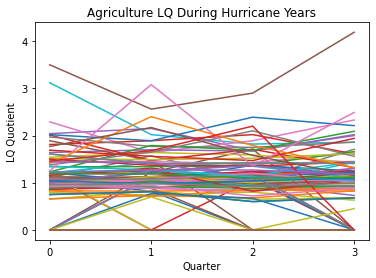

In [2021]:
#Plot of LQ quotients in agriculture by quarter for each county
a=[df_lq[df_lq.columns[0]],
   df_lq[df_lq.columns[90]],
   df_lq[df_lq.columns[180]],
   df_lq[df_lq.columns[270]]]
import matplotlib.pyplot as plt
plt.plot(a);
plt.xticks([0,1,2,3])
plt.title('Agriculture LQ During Hurricane Years')
plt.xlabel('Quarter')
plt.ylabel('LQ Quotient');

/Users/andrewdavis/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/andrewdavis/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


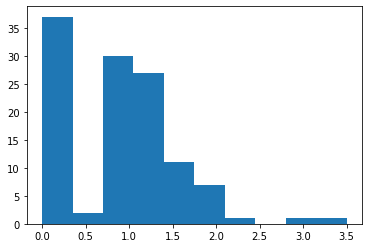

In [2022]:
#Distribution of agriculture LQ quotients
plt.hist(df_lq[df_lq.columns[0]]);

In [2023]:
df['geoid'].nunique()

14

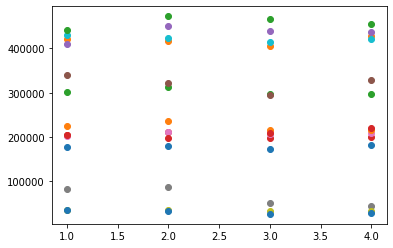

In [2024]:
#Dot plot of leisure employees by quarter by county, useless
emp=[]
for i in df['geoid'].unique():
    a1=df['month3_emplvl_1026_leisure_and_hospitality'][df['geoid']==i].sum()
    a2=df['month3_emplvl_1026_leisure_and_hospitality.1'][df['geoid']==i].sum()
    a3=df['month3_emplvl_1026_leisure_and_hospitality.2'][df['geoid']==i].sum()
    a4=df['month3_emplvl_1026_leisure_and_hospitality.3'][df['geoid']==i].sum()
    plt.scatter(x=[1,2,3,4],y=[a1,a2,a3,a4]);

In [2025]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2026]:
X.shape

(118, 87)

In [2027]:
ss=StandardScaler()
Xsc=ss.fit_transform(X)

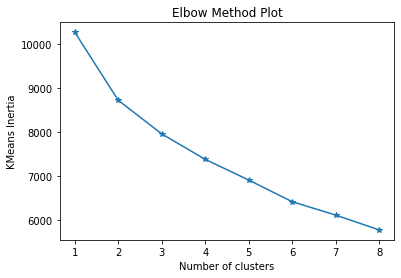

In [2028]:
#Elbow plot to determine clusters
ns =[]
ines = []
for n in range(1, 9, 1):
    ns.append(n)
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(Xsc)
    ines.append(kmeans.inertia_)
plt.plot(ns, ines,marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('KMeans Inertia')
plt.title('Elbow Method Plot');

In [2029]:
#With elbow plot not exactly descriptive, choose 5 clusters
km=KMeans(n_clusters=5, random_state=2020)
km.fit(Xsc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2020, tol=0.0001, verbose=0)

In [2030]:
X.shape

(118, 87)

In [2031]:
X.columns[-1]

'est_29.0_avg'

In [2032]:
km.labels_

array([0, 4, 2, 2, 0, 0, 4, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 4, 2, 0, 2, 2, 1, 0, 1, 4, 0, 2, 0, 2, 4, 2, 0, 0, 0, 0, 4,
       4, 0, 1, 1, 1, 1, 0, 0, 4, 0, 2, 2, 0, 0, 0, 2, 2, 3, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 3, 0, 0, 0, 1, 1, 1, 1, 4, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 4, 4, 0, 2, 0, 2, 0, 2, 2, 3, 2, 0, 2, 3, 2, 0, 0, 0, 0,
       0, 1, 0, 4, 0, 2, 0, 0], dtype=int32)

In [2033]:
#Assign county clusters to the db
df['lq_cluster']=km.labels_
df_lq['lq_cluster']=km.labels_

In [2034]:
cl_exp=df[['geoid','lq_cluster','area_fips','year','county','emp_chg']]

In [2035]:
#Cluster 1, mostly Puerto Rico 
cl_exp[cl_exp['lq_cluster']==1]

,geoid,lq_cluster,area_fips,year,county,emp_chg
8,Frances,1,72113,2004,Ponce,0.070335
9,Frances,1,72057,2004,Guayama,0.095100
11,Frances,1,72025,2004,Caguas,0.095684
30,Irene,1,72151,2011,Yabucao,0.016069
32,Irene,1,72063,2011,Gurabo,0.058637
47,Irma,1,72113,2017,Ponce,0.022784
48,Irma,1,72025,2017,Caguas,-0.003478
49,Irma,1,72021,2017,Bayamon,-0.010113
50,Irma,1,72013,2017,Arecibo,0.002989
77,Maria,1,72113,2017,Ponce,0.022784


In [2036]:
#Cluster 3
cl_exp[cl_exp['lq_cluster']==1]

,geoid,lq_cluster,area_fips,year,county,emp_chg
8,Frances,1,72113,2004,Ponce,0.070335
9,Frances,1,72057,2004,Guayama,0.095100
11,Frances,1,72025,2004,Caguas,0.095684
30,Irene,1,72151,2011,Yabucao,0.016069
32,Irene,1,72063,2011,Gurabo,0.058637
47,Irma,1,72113,2017,Ponce,0.022784
48,Irma,1,72025,2017,Caguas,-0.003478
49,Irma,1,72021,2017,Bayamon,-0.010113
50,Irma,1,72013,2017,Arecibo,0.002989
77,Maria,1,72113,2017,Ponce,0.022784


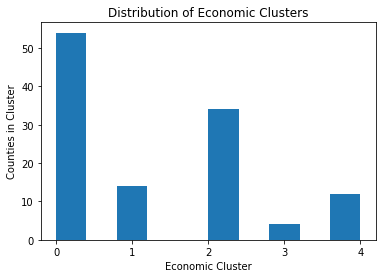

In [2037]:
#Histogram of clusters
plt.hist(df_lq['lq_cluster']);
plt.xticks([0,1,2,3,4]);
plt.ylabel('Counties in Cluster')
plt.xlabel('Economic Cluster')
plt.title ('Distribution of Economic Clusters');

In [2038]:
df_lq.columns[90]

'lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting.1'

In [2039]:
df_lq.columns[91]

'lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting.1'

In [2040]:
#Dummify clusters
dummy_cluster=pd.get_dummies(df['lq_cluster'],drop_first=True)
dummy_cluster.columns=['cl_1','cl_2','cl_3','cl_4']

In [2041]:
feats=['category','est_av','wage_av','emp_av']

In [2042]:
#Create polynomial features for predicting damage by county
X=df[feats]
X=pd.concat([X,dummy_cluster],axis=1)
y=df['damage_by_county']
pf=PolynomialFeatures(degree=2,interaction_only=False)
Xpf=pf.fit_transform(X)
Xpf_train,Xpf_test,y_train,y_test=train_test_split(Xpf,y,test_size=.2,random_state=1024)

In [2043]:
y

0      2.133333
1      2.133333
2      2.133333
3      2.133333
4      2.133333
         ...   
114    2.533333
115    2.533333
116    2.533333
118    2.533333
119    2.533333
Name: damage_by_county, Length: 118, dtype: float64

In [2044]:
lrs=LinearRegression()
lrs.fit(Xpf_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2045]:
#Still gross
lrs.score(Xpf_train,y_train),lrs.score(Xpf_test,y_test)

(0.21019070762457237, -1.3811292732658162)

In [2046]:
#Coefficients of model
coefdf=pd.Series(index=pf.get_feature_names(X.columns),data=lrs.coef_)
coefdf

1                   5.058449e+02
category            4.104234e+00
est_av             -4.328815e-04
wage_av             1.518061e-02
emp_av              1.832628e-05
cl_1               -1.295293e+00
cl_2               -7.645713e-01
cl_3               -1.376078e-03
cl_4                1.500598e+00
category^2         -6.191462e-01
category est_av    -1.584824e-04
category wage_av    3.216468e-03
category emp_av     7.185825e-06
category cl_1       1.864674e+00
category cl_2      -1.007432e+00
category cl_3      -4.424681e-03
category cl_4      -1.009822e+00
est_av^2            8.393112e-09
est_av wage_av      6.901212e-07
est_av emp_av      -8.649382e-10
est_av cl_1        -9.263516e-05
est_av cl_2        -2.098318e-03
est_av cl_3         3.710956e-01
est_av cl_4         7.850016e-04
wage_av^2          -6.997885e-06
wage_av emp_av     -4.444172e-08
wage_av cl_1       -5.465844e-03
wage_av cl_2       -3.619236e-03
wage_av cl_3       -5.349736e-02
wage_av cl_4       -1.881706e-03
emp_av^2  

In [2047]:
Xpfs_train=ss.fit_transform(Xpf_train)
Xpfs_test=ss.fit_transform(Xpf_test)

In [2048]:
lasso_alphas = np.logspace(-3, 6, 100)
lasso_cluster = LassoCV(alphas = lasso_alphas, cv = 5)
lasso_cluster.fit(Xpfs_train,y_train)

/Users/andrewdavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25740831483471993, tolerance: 0.19308722235278022
  tol, rng, random, positive)
/Users/andrewdavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38376150971089373, tolerance: 0.19308722235278022
  tol, rng, random, positive)
/Users/andrewdavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5810808120256752, tolerance: 0.19308722235278022
  tol, rng, random, positive)
/Users/andrewdavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_

LassoCV(alphas=array([1.00000000e-03, 1.23284674e-03, 1.51991108e-03, 1.87381742e-03,
       2.31012970e-03, 2.84803587e-03, 3.51119173e-03, 4.32876128e-03,
       5.33669923e-03, 6.57933225e-03, 8.11130831e-03, 1.00000000e-02,
       1.23284674e-02, 1.51991108e-02, 1.87381742e-02, 2.31012970e-02,
       2.84803587e-02, 3.51119173e-02, 4.32876128e-02, 5.33669923e-02,
       6.57933225e-02, 8.11130831e-0...
       1.00000000e+05, 1.23284674e+05, 1.51991108e+05, 1.87381742e+05,
       2.31012970e+05, 2.84803587e+05, 3.51119173e+05, 4.32876128e+05,
       5.33669923e+05, 6.57933225e+05, 8.11130831e+05, 1.00000000e+06]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [2049]:
#Compare zeroed out terms to terms kept
beta_vals=pd.Series(index=pf.get_feature_names(X.columns),data=lasso_cluster.coef_)
beta_vals[beta_vals==0].shape,beta_vals[beta_vals!=0].shape

((38,), (7,))

In [2050]:
lasso_cluster.score(Xpfs_train,y_train),lasso_cluster.score(Xpfs_test,y_test)

(0.17278837616545284, -0.24181592421200415)

In [2051]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
rfr=RandomForestRegressor()
X=df[feats]
X=pd.concat([X,dummy_cluster],axis=1)
y=df['damage_by_county']
pf=PolynomialFeatures(degree=2,interaction_only=False)
Xpfr=pf.fit_transform(X)
Xpfr_train,Xpfr_test,y_train,y_test=train_test_split(Xpfr,y,test_size=.2, random_state=1024)

In [2052]:
#Try a random forest regressor
rfr.fit(Xpfr_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [2053]:
rfr.score(Xpfr_train,y_train),rfr.score(Xpfr_test,y_test)

(0.6380963251284274, 0.1626307220725971)

In [2054]:
def bd(n):
    return n<-.05

In [2055]:
#Mark counties that saw an employment drop of >5%
df['big_drop']=df['emp_chg'].map(bd).astype(int)

In [2056]:
df['big_drop'].value_counts()

0    100
1     18
Name: big_drop, dtype: int64

In [2057]:
#can we predict susceptible counties to large employment drops?
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
rfc=RandomForestClassifier()
Xc=df[feats]
Xc=pd.concat([Xc,dummy_cluster],axis=1)
y=df['big_drop']
Xc_train,Xc_test,y_train,y_test=train_test_split(Xc,y,stratify=y,random_state=1047)

In [2059]:
Xc

,category,est_av,wage_av,emp_av,cl_1,cl_2,cl_3,cl_4
0,4,29965.5,672.0,560154.5,0,0,0,0
1,4,3970.5,524.5,31054.5,0,0,0,1
2,4,496.5,415.0,5280.5,0,1,0,0
3,4,545.0,409.5,6368.5,0,1,0,0
4,4,10413.5,627.5,109380.0,0,0,0,0
...,...,...,...,...,...,...,...,...
114,3,4069.5,583.5,29648.0,0,0,0,1
115,3,17045.0,658.0,181933.5,0,0,0,0
116,3,683.0,510.0,9148.5,0,1,0,0
118,3,11519.5,701.0,113256.0,0,0,0,0


In [ ]:
Xz_train,Xz_test,yz_train,yz_test=train_test_split(Xc,y,stratify=y,random_state=97)

In [2060]:
#Find best classifier
rfc = RandomForestClassifier()
params = {
    'n_estimators': [5,25,50,100],
    'max_depth':[None,5,10],
    'max_features':[2,3,4,5,6],
}
gs = GridSearchCV(rfc, param_grid=params, cv=5)
gs.fit(Xc_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gs.best_params_

In [2061]:
gs.score(Xz_train,yz_train),gs.score(Xz_test,yz_test) 

(0.9772727272727273, 0.9333333333333333)

In [2063]:
100/118# baseline score

0.847457627118644

In [2066]:
yz_test,len(yz_test) #with this few successes we have unbalanced classes

(43     0
 94     1
 89     1
 18     0
 118    0
 81     0
 107    0
 116    0
 99     0
 65     0
 106    0
 31     0
 25     1
 101    1
 58     0
 110    0
 32     0
 96     0
 104    0
 16     0
 46     0
 5      0
 56     0
 38     0
 87     0
 77     0
 79     0
 22     0
 109    0
 93     1
 Name: big_drop, dtype: int64,
 30)

In [2067]:
gs.predict(Xz_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1])